# Loi de Benford et données d'abondance de protéines
Ce script a pour but de vérifier si l'abondance de protéines, issue de données expérimentale mesurées par spectrométrie de masse, suit la loi de benford. Le fichier contient 12 expérince en colonne de l'abondance des protéines

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import benford

%load_ext autoreload
%autoreload 2

In [2]:
data = pd.read_csv("1512006-Calbicans-QUANTI_raw_abundance.csv", sep=",", header=None)
print(data.shape)
data.head()

(2356, 12)


,0,1,2,3,4,5,6,7,8,9,10,11
0,9.325899e+04,2.765206e+04,6.973654e+04,6.309967e+04,2.252522e+04,5.307728e+04,9.088306e+04,2.035561e+04,0.000000e+00,0.000000e+00,1.021926e+05,1.794098e+05
1,5.042612e+07,1.592204e+07,4.388571e+07,1.824970e+07,1.596605e+07,1.566419e+07,2.563818e+07,2.666071e+07,1.431299e+07,2.617207e+07,2.847710e+07,4.051467e+07
2,0.000000e+00,0.000000e+00,6.015709e+03,2.413695e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.132027e+03,4.891291e+04,2.974154e+04,4.261914e+04
3,1.560630e+07,7.262593e+06,4.718013e+06,2.570901e+06,1.629196e+06,2.344451e+06,2.178284e+07,2.715498e+07,1.042588e+06,2.429717e+06,1.749820e+06,2.306792e+06
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.729096e+03,3.448312e+04


In [3]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,2.356000e+03,2.356000e+03,2.356000e+03,2.356000e+03,2.356000e+03,2.356000e+03,2.356000e+03,2.356000e+03,2.356000e+03,2.356000e+03,2.356000e+03,2.356000e+03
mean,9.581614e+06,4.052261e+06,1.076837e+07,3.978163e+06,4.193656e+06,4.893936e+06,5.159211e+06,4.210483e+06,3.024618e+06,7.153360e+06,5.233013e+06,8.720928e+06
std,4.125241e+07,1.657254e+07,4.375361e+07,1.619806e+07,1.691781e+07,1.932079e+07,2.153755e+07,1.789246e+07,1.163298e+07,2.881443e+07,2.162810e+07,3.816761e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.296491e+04,3.506632e+04,1.029519e+05,4.253416e+04,3.999578e+04,4.841961e+04,3.683583e+04,1.386838e+04,3.081028e+04,6.278149e+04,4.784145e+04,6.436681e+04
50%,5.528054e+05,2.330474e+05,6.421764e+05,2.474077e+05,2.635641e+05,3.213512e+05,2.800026e+05,1.677515e+05,2.009571e+05,4.372223e+05,2.972878e+05,4.575889e+05
75%,2.548738e+06,1.242274e+06,3.258557e+06,1.268807e+06,1.331303e+06,1.555117e+06,1.468795e+06,1.066523e+06,1.041927e+06,2.255124e+06,1.609874e+06,2.565324e+06
max,8.084879e+08,3.745571e+08,8.851789e+08,3.320042e+08,3.169179e+08,3.253303e+08,5.001720e+08,3.281611e+08,1.973859e+08,5.360345e+08,3.759082e+08,7.139125e+08


<font color='red'> ici on transforme les valeur en int à refaire en prenant des float's</font>

In [4]:
# données dans un array d'une dimmenssion
exp_numbers = data.values.reshape(data.shape[0]*data.shape[1])
print(exp_numbers.shape)
exp_numbers = np.array(exp_numbers, dtype=int)

(28272,)


In [5]:
# Remove 0
exp_numbers = exp_numbers[ exp_numbers > 0 ]
exp_numbers.shape

(26919,)

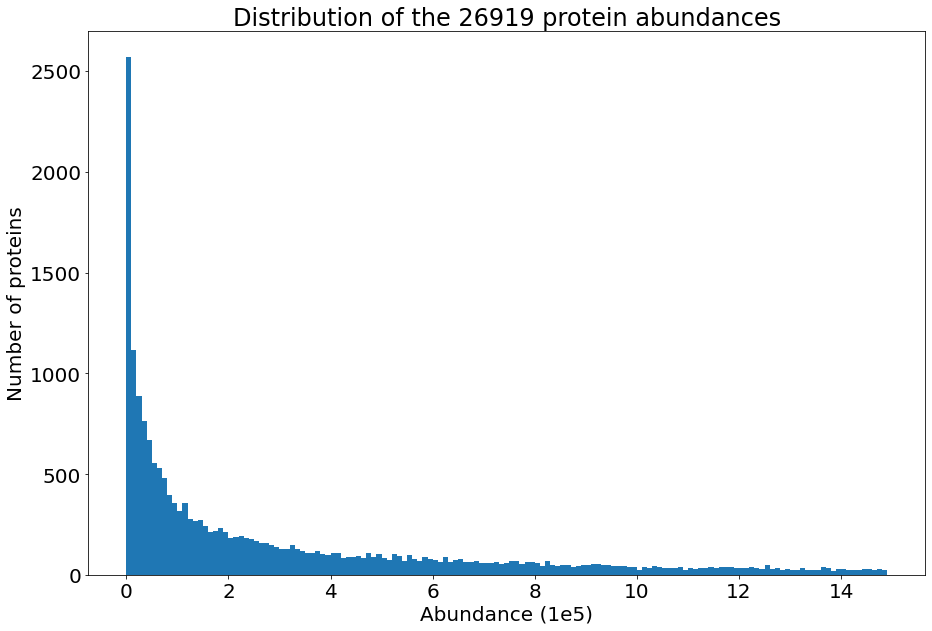

In [6]:
x_lab = [0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4]
x_lab = np.array(x_lab)
plt.figure(figsize=(15,10))
plt.rc('font', size=20)
plt.hist(exp_numbers, bins=range(0, 1_500_000, 10_000))
plt.xticks(ticks=x_lab*(10**6),labels=range(0, 16, 2))
plt.xlabel("Abundance (1e5)")
#plt.hist(exp_numbers, bins=range(0, 2500, 10))
#plt.xticks(range(0, 2500, 200))
#plt.xlabel("Abundance")
plt.title(f"Distribution of the {exp_numbers.shape[0]} protein abundances")
plt.ylabel("Number of proteins");
#plt.savefig("distrubution_protein_abundances.png", transparent=True);

## Analyse des $1^{er}$ digit

In [7]:
f_benford = benford.get_theoretical_freq_benford()
d_obs = benford.count_first_digit(exp_numbers)

### Histogramme de la fréquence des first digit de la loi de Benford et de l'abondance des protéines

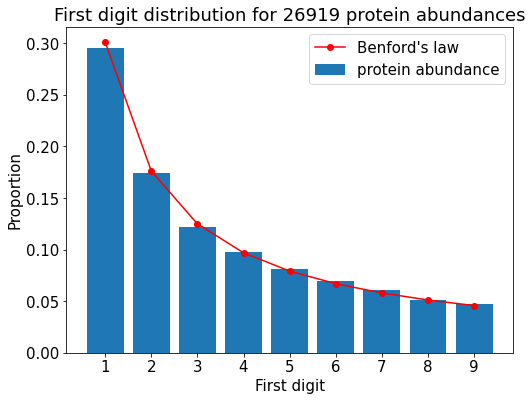

In [8]:
plt.rc('font', size=15)
benford.build_hist_freq_ben(benford.normalize_first_digit(d_obs), f_benford, nb_digit=1,
                            title=(f"First digit distribution for {len(exp_numbers)} protein abundances"),
                            legend="protein abundance",  size=(8, 6))
plt.savefig("benford_distrib_abundance.png")

### Test statistique par la procédure "bootstrap"

In [9]:
%%time
statistics, P_val, nb_signif = benford.calculate_bootstrap_chi2(exp_numbers, f_benford, nb_digit=1)

statistics : 8.493025996283798 ; p-value : 0.38684826808810546 ; number of significant tests : 71
CPU times: user 4.81 s, sys: 4.28 ms, total: 4.81 s
Wall time: 4.82 s


Le résultat du test montre que le premier chiffre significatif de l'abondance de protéine suit la loi de Benford pour un risque $\alpha = 5\%$.

## Analyse des deux $1^{er}$ digit

In [10]:
f_benford = benford.get_theoretical_freq_benford(2)
d_obs = benford.count_first_digit(exp_numbers, 2)

IndexError: string index out of range

### Histogramme de la fréquence des first digit de la loi de Benford et de l'abondance des protéines

In [ ]:
benford.build_hist_freq_ben(benford.normalize_first_digit(d_obs), f_benford, nb_digit=2,
                            title=("Theoretical Benford law and First digit distribution \n "
                            f"of the {sum(d_obs)} protein  abundances"),
                            legend="protein Abundances", size=(40, 15))

### Test statistique par la procédure "bootstrap"

In [ ]:
%%time
statistics, P_val, nb_signif = benford.calculate_bootstrap_chi2(exp_numbers, f_benford, nb_digit=2)

Le résultat du test montre que les deux premiers chiffres significatifs de l'abondance de protéine suit, aussi, la loi de Benford pour un risque $\alpha = 5\%$.